images/bicycle.jpeg


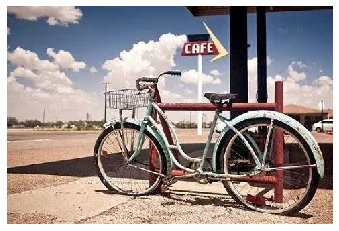

 tricycle, trike, velocipede (score = 0.50459 )
 bicycle-built-for-two, tandem bicycle, tandem (score = 0.13058 )
 jinrikisha, ricksha, rickshaw (score = 0.02331 )
 gas pump, gasoline pump, petrol pump, island dispenser (score = 0.01916 )
 moped (score = 0.01170 )
images/building.jpg


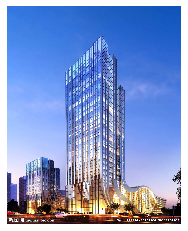

 lakeside, lakeshore (score = 0.10403 )
 pier (score = 0.10085 )
 seashore, coast, seacoast, sea-coast (score = 0.08734 )
 breakwater, groin, groyne, mole, bulwark, seawall, jetty (score = 0.07575 )
 fountain (score = 0.07402 )
images/cat.jpg


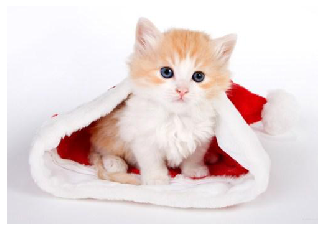

 Persian cat (score = 0.71267 )
 hamper (score = 0.02557 )
 lynx, catamount (score = 0.00753 )
 plastic bag (score = 0.00720 )
 Angora, Angora rabbit (score = 0.00669 )
images/dao1.jpg


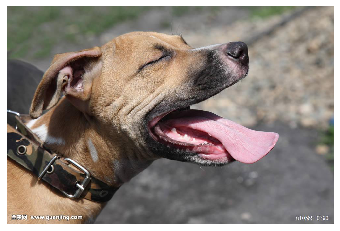

 American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier (score = 0.73973 )
 bull mastiff (score = 0.05432 )
 Staffordshire bullterrier, Staffordshire bull terrier (score = 0.04464 )
 Rhodesian ridgeback (score = 0.03238 )
 boxer (score = 0.02009 )
images/dao2.jpg


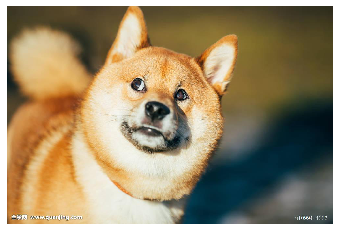

 Pembroke, Pembroke Welsh corgi (score = 0.57661 )
 Cardigan, Cardigan Welsh corgi (score = 0.06299 )
 basenji (score = 0.04691 )
 dingo, warrigal, warragal, Canis dingo (score = 0.03607 )
 Eskimo dog, husky (score = 0.02571 )
images/g1111.jpg


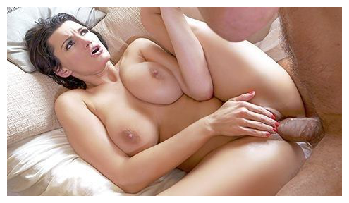

 diaper, nappy, napkin (score = 0.31514 )
 swimming trunks, bathing trunks (score = 0.27578 )
 bath towel (score = 0.06944 )
 bathtub, bathing tub, bath, tub (score = 0.03797 )
 bikini, two-piece (score = 0.01754 )
images/Girl.jpg


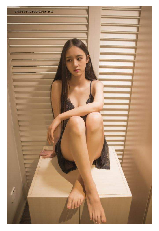

 carton (score = 0.16799 )
 window shade (score = 0.09779 )
 bikini, two-piece (score = 0.08240 )
 brassiere, bra, bandeau (score = 0.04957 )
 maillot (score = 0.03407 )
images/lions.jpg


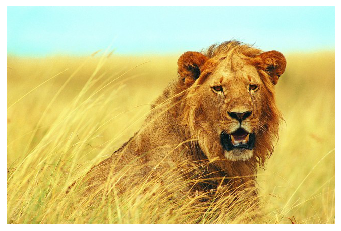

 lion, king of beasts, Panthera leo (score = 0.95137 )
 cheetah, chetah, Acinonyx jubatus (score = 0.00070 )
 warthog (score = 0.00057 )
 pencil box, pencil case (score = 0.00052 )
 impala, Aepyceros melampus (score = 0.00050 )
images/monkey.jpg


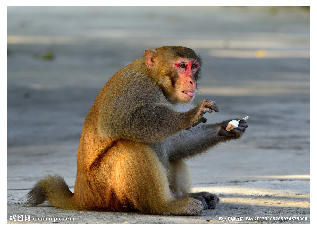

 macaque (score = 0.50235 )
 patas, hussar monkey, Erythrocebus patas (score = 0.21607 )
 baboon (score = 0.06015 )
 guenon, guenon monkey (score = 0.04171 )
 langur (score = 0.00782 )
images/Volleyball.jpg


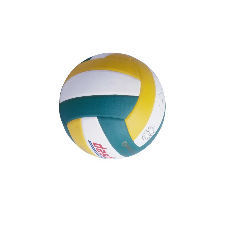

 volleyball (score = 0.87557 )
 tennis ball (score = 0.03748 )
 rugby ball (score = 0.03608 )
 basketball (score = 0.01311 )
 soccer ball (score = 0.00231 )


In [2]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image # 需要在anaconda 中安装pillow
import matplotlib.pyplot as plt


class NodeLookup(object):
    def __init__(self):
        leable_lookup_path = "inception_model/imagenet_2012_challenge_label_map_proto.pbtxt"
        uid_lookup_path = "inception_model/imagenet_synset_to_human_label_map.txt"
        self.node_lookup = self.load(leable_lookup_path,uid_lookup_path)
#         print("-------->",self.node_lookup)
    
    def load(self, leable_lookup_path, uid_lookup_path):
        # 加载分类字符串，对应分类名称的文件
        proto_as_ascii_lines = tf.gfile.GFile(uid_lookup_path).readlines();
        uid_to_human = {}
        # 一行一行读取数据
        for line in proto_as_ascii_lines:
            #去掉换行符
            line = line.strip("\n")
            # 按照"\t"分割
            parsed_ites = line.split("\t")
            # 获取分类编号
            uid = parsed_ites[0]
            # 获取分类名称
            human_string = parsed_ites[1]
            # 保存编号字符串 和分类名称对应关系
            uid_to_human[uid] = human_string
        
        # 加载分类字符串 对应分类编号1-1000的文件
        proto_as_ascii = tf.gfile.GFile(leable_lookup_path).readlines();
        node_id_to_uid = {}
        for line in proto_as_ascii:
            if line.startswith("  target_class:"):
                #获取分类编号 1-1000
                target_class = int(line.split(": ")[1])
            if line.startswith("  target_class_string:"):
                # 获取编号字符串
                target_class_string = line.split(": ")[1]
                # 保存分类编号 1-1000 和 编号字符串的映射关系
                node_id_to_uid[target_class] = target_class_string[1:-2]
            
        # 建立分类编号1-1000和对应分类名称的映射关系
        node_id_to_name = {}
        for key , val in node_id_to_uid.items():
            # 获取分类名称
            name = uid_to_human[val]
            # 建立分类编号1-1000和对应分类名称的映射关系
            node_id_to_name[key] = name;
            
        return node_id_to_name;
    
    # 传入分类编号 1-1000 返回分类名称
    def id_to_string(self, node_id):
#         print("=======>",node_id)
        if node_id not in self.node_lookup:
            return ""
        return self.node_lookup[node_id];
    
    
# 模型存放地址
inception_pretrain_model_dir = "inception_model"
# classify_image_graph_def.pb为google训练好的模型
inception_graph_def_file = os.path.join(inception_pretrain_model_dir, 'classify_image_graph_def.pb')

#建立一个图来存放Google训练好的模型
with tf.gfile.FastGFile(inception_graph_def_file, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name("softmax:0")
    # 遍历目录
    for root,dirs,files in os.walk("images/"):
        for file in files:
            #载入图片
            image_data = tf.gfile.FastGFile(os.path.join(root,file),"rb").read()
            predictions = sess.run(softmax_tensor,{ "DecodeJpeg/contents:0" : image_data }) #图片格式是jpg
            predictions = np.squeeze(predictions) #将结果转换为一维数组
            
            #打印图片路径以及名称
            image_path = os.path.join(root,file)
            print(image_path)
            # 显示图片
            img = Image.open(image_path)
            plt.imshow(img)
            plt.axis("off")
            plt.show()
            
            # 排序
            top_k = predictions.argsort()[-5:][::-1]
            node_lookup = NodeLookup()
            for node_id in top_k:
                # 获取分类名称
                human_string = node_lookup.id_to_string(node_id)
                # 获取分类的可能性
                score = predictions[node_id];
                print(" %s (score = %.5f )" % (human_string,score) )




